In [ ]:
# Start writing code here...

## 1. Donor Pool & Control Construction.

Using K-means to cluster the PCA decomposition of countries, we came up with a donor pool consisting of the following countries:
1) Latvia
2) Norway
3) Sweden
4) Turkey

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model

%matplotlib inline

plt.style.use('seaborn-darkgrid')

In [ ]:
# Top_imports = ['United States', 'Japan', 'Thailand', 'Germany', 'Phillipines','Canada','Australia','Korea, South (Republic of Korea)']

Top_imports = ['Japan', 'United States',
       'Thailand', 'Germany', 'Philippines', 'Belgium', 'Australia',
       'Indonesia', 'Malaysia', 'Korea, Republic of', 'Canada',
       'Viet Nam', 'Netherlands', 'United Kingdom', 'Mexico',
       'Spain', 'France']

In [ ]:
# Control_imports = ['Bulgaria','Jamaica','Latvia', 'Norway', 'Sweden', 'Turkey']
Control_imports = ['Bulgaria',
 'Jamaica',
 'Latvia',
 'Norway',
 'Sweden',
 'Turkey']

In [ ]:
len(Control_imports)

6

In [ ]:
# Load toy dataset of tobacco use in U.S. states.
df = pd.read_csv("import_export.csv")
df = df[(df['Country'].isin(Top_imports)) | (df['Country'].isin(Control_imports))]
df = df[df['Year'] > 2009]
df

,Unnamed: 0,Country,Year,Metric tons in thousands_x,Metric tons in thousands_y
4715,4715,Australia,2010,175.755,4374.538
4724,4724,Belgium,2010,4810.619,8425.148
4733,4733,Bulgaria,2010,288.957,396.797
4747,4747,Canada,2010,3791.641,5403.703
4846,4846,France,2010,2795.906,14327.638
...,...,...,...,...,...
8420,8420,Thailand,2020,4407.172,2691.805
8422,8422,Turkey,2020,20997.436,813.497
8429,8429,United Kingdom,2020,2454.017,16758.769
8431,8431,United States,2020,13073.177,19470.208


In [ ]:
df['Country'].unique()

array(['Australia', 'Belgium', 'Bulgaria', 'Canada', 'France', 'Germany',
       'Indonesia', 'Jamaica', 'Japan', 'Korea, Republic of', 'Latvia',
       'Malaysia', 'Mexico', 'Netherlands', 'Norway', 'Philippines',
       'Spain', 'Sweden', 'Thailand', 'Turkey', 'United Kingdom',
       'United States', 'Viet Nam'], dtype=object)

In [ ]:
df = df.iloc[:,1:]
df['treatment'] = df.apply(lambda x: 1 if x['Country'] in Top_imports else 0, axis=1)
df['after_treatment'] = df.apply(lambda x: 1 if x['Year'] > 2017 else 0, axis=1)
df

,Country,Year,Metric tons in thousands_x,Metric tons in thousands_y,treatment,after_treatment
4715,Australia,2010,175.755,4374.538,1,0
4724,Belgium,2010,4810.619,8425.148,1,0
4733,Bulgaria,2010,288.957,396.797,0,0
4747,Canada,2010,3791.641,5403.703,1,0
4846,France,2010,2795.906,14327.638,1,0
...,...,...,...,...,...,...
8420,Thailand,2020,4407.172,2691.805,1,1
8422,Turkey,2020,20997.436,813.497,0,1
8429,United Kingdom,2020,2454.017,16758.769,1,1
8431,United States,2020,13073.177,19470.208,1,1


In [ ]:
df['Trade flow'] = df['Metric tons in thousands_y'] - df['Metric tons in thousands_x']

In [ ]:
sum(df['Trade flow'].isna())

0

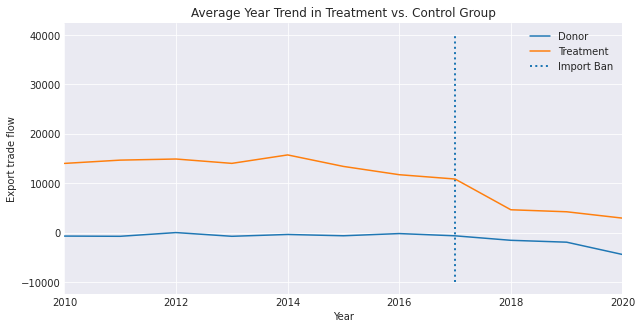

In [ ]:
ax = plt.subplot(1, 1, 1)

(df
 .assign(treatment = np.where(df["treatment"], "Treatment", "Donor"))
 .groupby(["Year", "treatment"])
 ["Trade flow"]
 .mean()
 .reset_index()
 .pivot("Year", "treatment", "Trade flow")
 .plot(ax=ax, figsize=(10,5)))

plt.vlines(x=2017, ymin=-10000, ymax=40000, linestyle=":", lw=2, label="Import Ban")
plt.ylabel("Export trade flow")
plt.xlim((2010,2020))
plt.title("Average Year Trend in Treatment vs. Control Group")
plt.style.use('seaborn-dark')
plt.legend();

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
df2 = df.iloc[:,2:4]
df2 = imputer.fit_transform(df2)
df2

array([[1.7575500e+02, 4.3745380e+03],
       [4.8106190e+03, 8.4251480e+03],
       [2.8895700e+02, 3.9679700e+02],
       [3.7916410e+03, 5.4037030e+03],
       [2.7959060e+03, 1.4327638e+04],
       [9.2837010e+03, 4.9030223e+04],
       [1.1097020e+03, 4.6065930e+03],
       [6.3000000e-01, 6.0600000e-01],
       [3.9949200e+02, 5.3910572e+04],
       [1.8302130e+03, 7.7451630e+03],
       [1.8516320e+03, 2.1604600e+02],
       [2.4081200e+03, 4.7355490e+03],
       [1.2242470e+03, 1.2150764e+04],
       [8.3043060e+03, 1.0799389e+04],
       [1.3971700e+02, 9.7498700e+02],
       [5.0701000e+01, 4.7803700e+03],
       [1.2708870e+03, 7.0823910e+03],
       [6.0947590e+03, 2.5479370e+03],
       [7.0905300e+02, 7.4972030e+03],
       [9.1581400e+02, 8.4789000e+02],
       [1.5640530e+03, 2.5982820e+04],
       [1.2338962e+04, 6.9462662e+04],
       [1.9900690e+03, 1.5126480e+03],
       [2.1868700e+02, 4.4225290e+03],
       [5.7976290e+03, 8.7587420e+03],
       [2.1861100e+02, 3.

In [ ]:
df_1 = df[df['Year'] >= 2010]

features = ["Trade flow"]

inverted = (df_1[df_1['after_treatment']==0].pivot(index='Country', columns="Year")[features].T) # flip the table to have one column per state

inverted

Country          Australia   Belgium  Bulgaria    Canada     France  \
           Year                                                       
Trade flow 2010   4198.783  3614.529   107.840  1612.062  11531.732   
           2011   4203.842  2961.113   166.117  1853.372  12233.829   
           2012   5777.086  4164.063   263.082  1910.917  12387.633   
           2013   4766.290  5241.048   -14.748  1111.194  10637.713   
           2014   5596.997  5590.886   -83.995   698.504  11631.848   
           2015   6199.517  3568.792  -451.181  -152.919  11008.807   
           2016   5785.586  3567.567  -674.543  1919.071  11224.185   
           2017   4556.482  4896.567  -556.490  2126.524   9753.342   

Country            Germany  Indonesia  Jamaica      Japan  Korea, Republic of  \
           Year                                                                 
Trade flow 2010  39746.522   3496.891   -0.024  53511.080            5914.950   
           2011  40831.682   3781.726    7.157  55062.856            3988.800   
           2012  39302.019   4792.254    5.764  58074.048            4630.500   
           2013  32922.912   5413.299   22.513  58562.603            4323.943   
           2014  34717.253   4918.359   83.070  56967.472            4463.801   
           2015  30518.103   3359.360   61.794  54684.474            4724.586   
           2016  32752.730   4734.135  101.505  51956.701            5719.180   
           2017  25104.206   3827.559   92.505  50265.934            5122.287   

Country          ...  Netherlands    Norway  Philippines      Spain    Sweden  \
           Year  ...                                                            
Trade flow 2010  ...     2495.083   835.270     4729.669   5811.504 -3546.822   
           2011  ...     1133.537  1157.440     5452.359   4214.841 -2016.233   
           2012  ...      345.235  1184.163     4422.336   6475.067  2531.232   
           2013  ...     -432.593  1369.252     1741.737   6011.601 -1222.047   
           2014  ...    -3570.140  1300.858     5068.472  10212.613  -228.793   
           2015  ...    -1015.220  1229.838     4277.478   8744.572 -1313.591   
           2016  ...    -1058.613  1419.275     4895.470   8473.437  1742.281   
           2017  ...    -5640.180  1457.676     2718.642   7179.962  1669.992   

Country           Thailand    Turkey  United Kingdom  United States  Viet Nam  
           Year                                                                
Trade flow 2010   6788.150   -67.924       24418.767      57123.700  -477.421  
           2011   7562.520  -833.900       26901.960      63092.164  2191.959  
           2012   8741.978  -809.887       24684.586      60000.311     0.000  
           2013  10482.328  -879.922       19057.836      55517.034  6508.440  
           2014  10501.031 -2136.856       22540.391      61132.754  5422.518  
           2015   8255.946 -2105.348       24086.606      55223.439  1922.000  
           2016   2565.374 -3636.193       23516.415      25709.743  7482.632  
           2017   6665.559 -6500.296       19593.293      39910.748  7024.397  

[8 rows x 23 columns]

In [ ]:
inverted_df = inverted.reset_index()

# inverted_df = inverted_df.fillna.(inverted_df.mean(axis=1)).T
y = inverted_df.filter(Top_imports).values
X = inverted_df[inverted_df.columns[~inverted_df.columns.isin(Top_imports)]].iloc[:,2:].values
X

array([[ 1.078400e+02, -2.400000e-02, -1.635586e+03,  8.352700e+02,
        -3.546822e+03, -6.792400e+01],
       [ 1.661170e+02,  7.157000e+00, -3.055111e+03,  1.157440e+03,
        -2.016233e+03, -8.339000e+02],
       [ 2.630820e+02,  5.764000e+00, -3.237542e+03,  1.184163e+03,
         2.531232e+03, -8.098870e+02],
       [-1.474800e+01,  2.251300e+01, -3.847910e+03,  1.369252e+03,
        -1.222047e+03, -8.799220e+02],
       [-8.399500e+01,  8.307000e+01, -1.299557e+03,  1.300858e+03,
        -2.287930e+02, -2.136856e+03],
       [-4.511810e+02,  6.179400e+01, -1.358033e+03,  1.229838e+03,
        -1.313591e+03, -2.105348e+03],
       [-6.745430e+02,  1.015050e+02, -2.178020e+02,  1.419275e+03,
         1.742281e+03, -3.636193e+03],
       [-5.564900e+02,  9.250500e+01, -1.518000e+02,  1.457676e+03,
         1.669992e+03, -6.500296e+03]])

## 2. Fitting Synthetic Control

In [ ]:
# Use cross-validated lasso regression to construct the synthetic group.
from sklearn.linear_model import MultiTaskLassoCV
weights_lr = MultiTaskLassoCV(cv=5,fit_intercept=False).fit(X, y).coef_
weights_lr.round(3)

array([[ 0.0000e+00,  0.0000e+00, -4.3370e+00,  3.4810e+01, -1.7960e+00,
        -5.6300e-01],
       [ 0.0000e+00,  0.0000e+00, -7.3040e+00,  2.8416e+01, -3.3700e+00,
        -2.5300e-01],
       [ 0.0000e+00,  0.0000e+00, -1.2600e+00,  3.9020e+00, -3.4800e-01,
        -1.1200e-01],
       [ 0.0000e+00,  0.0000e+00, -3.2720e+00,  2.1718e+01, -1.5390e+00,
         2.1600e-01],
       [ 0.0000e+00,  0.0000e+00, -7.0000e-03,  3.2550e+00, -2.1700e-01,
         9.0000e-02],
       [ 0.0000e+00,  0.0000e+00, -2.8400e-01,  2.6560e+00, -6.3000e-02,
        -1.1500e-01],
       [ 0.0000e+00,  0.0000e+00, -1.8300e-01,  3.7080e+00, -2.2000e-02,
         4.0000e-03],
       [ 0.0000e+00,  0.0000e+00, -3.9300e-01,  2.7560e+00,  2.8000e-02,
        -1.3000e-02],
       [ 0.0000e+00,  0.0000e+00, -6.9600e-01,  6.0000e-03, -2.2200e-01,
         7.5800e-01],
       [ 0.0000e+00,  0.0000e+00, -4.1000e-02,  3.4920e+00, -2.2900e-01,
        -7.4000e-02],
       [ 0.0000e+00,  0.0000e+00, -1.5900e-01,  7.

In [ ]:
weights_lr.shape

(17, 6)

In [ ]:
print(X.shape)
print(y.shape)

(8, 6)
(8, 17)


In [ ]:
df_sync = df[df['treatment']==0].pivot(index='Year', columns="Country")['Trade flow']
df_sync = df_sync.apply(lambda x: x.fillna(x.mean()),axis=0)
df_sync

Country,Bulgaria,Jamaica,Latvia,Norway,Sweden,Turkey
Year,,,,,,
2010,107.8400,-0.0240,-1635.586,835.270,-3546.822,-67.924
2011,166.1170,7.1570,-3055.111,1157.440,-2016.233,-833.900
2012,263.0820,5.7640,-3237.542,1184.163,2531.232,-809.887
2013,-14.7480,22.5130,-3847.910,1369.252,-1222.047,-879.922
2014,-83.9950,83.0700,-1299.557,1300.858,-228.793,-2136.856
2015,-451.1810,61.7940,-1358.033,1229.838,-1313.591,-2105.348
2016,-674.5430,101.5050,-217.802,1419.275,1742.281,-3636.193
2017,-556.4900,92.5050,-151.800,1457.676,1669.992,-6500.296
2018,-773.9890,145.6290,-376.615,1472.062,1388.386,-11300.794


In [ ]:
synth_lr = df_sync.values.dot(weights_lr.T)
synth_lr

array([[ 42577.57505376,  47650.47680129,   6561.69980867,
         28934.94999996,   3495.12866131,   2914.36665099,
          3474.79651792,   2848.70656948,   1881.50846852,
          3802.89304386,    643.38686138,   1488.76981158,
           937.16772801,  18684.53813876,  10829.31165754,
          4885.43205529,   8813.31582524],
       [ 57631.59150952,  62208.55897509,   9160.59026739,
         38055.28778444,   4153.30602857,   4166.03979388,
          4893.03820614,   4347.45033786,   1950.64588183,
          4692.13302404,   1250.27232445,   2437.17867637,
           580.95002348,  24093.05572296,  14758.97744942,
          6201.53233974,  11805.7844176 ],
       [ 51172.46397006,  48969.41087288,   7910.24633424,
         32239.77466151,   3256.77404869,   4000.6793743 ,
          4925.57704965,   4617.70495246,   1084.65703299,
          3748.10877717,   1576.04156903,   3083.80960869,
          -621.90202356,  20144.44235507,  14221.29366177,
          5747.30536833,  104

## 3. SCM Model Comparison

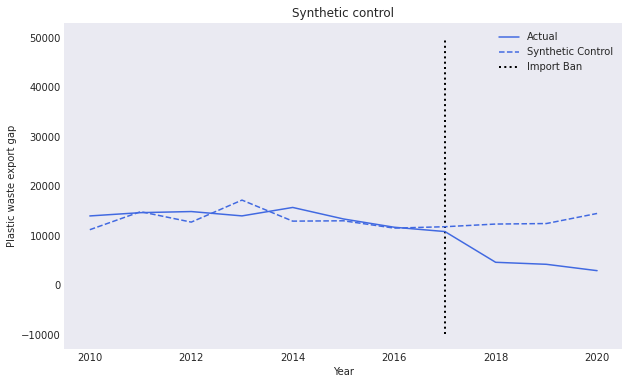

In [ ]:
# Plot treatment & synthetic control.
plt.figure(figsize=(10,6))
plt.plot(df_sync.index, df[df['treatment'] == 1].groupby('Year')['Trade flow'].mean(), color='royalblue',label="Actual")
plt.plot(df_sync.index, synth_lr.mean(axis=1), label="Synthetic Control", color='royalblue', linestyle="--")
plt.vlines(x=2017, ymin=-10000, ymax=50000, linestyle=":", lw=2, label="Import Ban", color='black')
plt.ylabel("Plastic waste export gap")
plt.xlabel('Year')
plt.title('Synthetic control')
plt.legend();

In [ ]:
synth_lr.shape

(11, 17)

In [ ]:
synth_plot = synth_lr.mean(axis=1)
synth_plot

array([11201.41315609, 14846.25839781, 12736.77731237, 17192.69471492,
       12934.72095559, 13004.15901784, 11523.66423365, 11805.17196957,
       12344.4093673 , 12448.24315584, 14486.08371026])

In [ ]:
# Estimate treatment effect.
Y_jt_I = df[df['treatment'] == 1].groupby('Year')['Trade flow'].mean()
Y_jt_N = synth_lr.mean(axis=1)

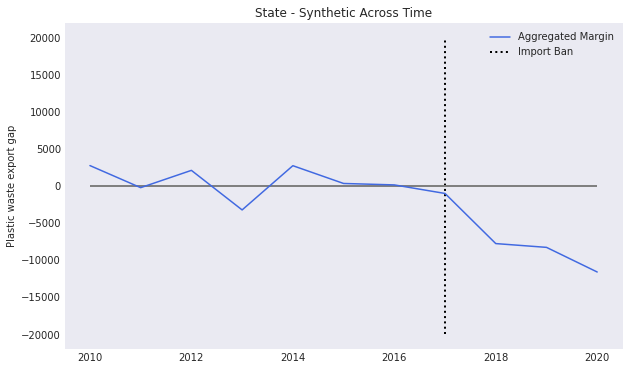

In [ ]:
# Plot treatment effect.
plt.figure(figsize=(10,6))
plt.plot(df_sync.index, Y_jt_I - Y_jt_N, color='royalblue',
         label="Aggregated Margin")
plt.vlines(x=2017, ymin=-20000, ymax=20000, linestyle=":", lw=2, label="Import Ban",color='black')
plt.hlines(y=0, xmin=2010, xmax=2020, lw=2, color='gray')
plt.title("State - Synthetic Across Time")
plt.ylabel("Plastic waste export gap")
plt.legend();

In [ ]:
synth_lr.shape

(11, 17)

In [ ]:
# Decision Tree Back Attribution
Y_ij_I = df[(df['treatment'] == 1) & (df['Year'] >= 2017)].groupby('Country')['Trade flow'].mean()
Y_ij_N = synth_lr[-4:,:].mean(axis=0)

effect = Y_ij_I - Y_ij_N
print(effect)
effect.to_csv('effect_country.csv')

# Top_imports = ['United States', 'Japan', 'Thailand', 'Germany', 'Phillipines','Canada','Australia','Korea, South (Republic of Korea)']

Country
Australia            -55012.160238
Belgium              -39380.378619
Canada                -6851.418185
France               -21695.994135
Germany               16259.426560
Indonesia             -8017.176147
Japan                 29774.215028
Korea, Republic of    -5442.305534
Malaysia              -2583.680468
Mexico                  221.593388
Netherlands           -7283.046758
Philippines           -6546.587207
Spain                  8129.377118
Thailand             -23903.628717
United Kingdom         3880.934559
United States         10338.002125
Viet Nam             -13166.512134
Name: Trade flow, dtype: float64


In [ ]:
# Effect for regression.
Y_I = df[(df['treatment'] == 1) & (df['Year'] >= 2018)].pivot(index='Year', columns="Country")['Trade flow']
Y_N = synth_lr[-3:,:]

# effect_lr = pd.DataFrame(Y_I - Y_N).T.reset_index()
# effect_18 = effect_lr.iloc[:,:2]
# effect_18['Year'] = 2018
# effect_18.rename(columns={2018:'Effect'},inplace=True)
# effect_18

effect_lr = pd.DataFrame(Y_I - Y_N).T.reset_index()
effect_lr
#effect_lr.to_csv('effect_country_year.csv')

Year,Country,2018,2019,2020
0,Australia,-51761.287341,-53439.981589,-67340.868572
1,Belgium,-37915.436115,-38727.416496,-47228.957529
2,Canada,-6252.096681,-7671.435935,-9584.161633
3,France,-20029.105251,-21445.561303,-26883.621805
4,Germany,15973.249393,15629.373450,12129.445624
5,Indonesia,-10688.525518,-9957.102926,-10691.431698
6,Japan,28276.760378,24299.611557,21625.539088
7,"Korea, Republic of",-6807.522217,-8560.361569,-7313.657405
8,Malaysia,-13220.592827,2984.256983,3476.291418
9,Mexico,966.114901,-1091.646170,-3527.375861


In [ ]:
# Effect for regression.
Y_I_2 = df[df['treatment'] == 1].pivot(index='Year', columns="Country")['Trade flow']
Y_N_2 = synth_lr

# effect_lr = pd.DataFrame(Y_I - Y_N).T.reset_index()
# effect_18 = effect_lr.iloc[:,:2]
# effect_18['Year'] = 2018
# effect_18.rename(columns={2018:'Effect'},inplace=True)
# effect_18

effect_lr_2 = pd.DataFrame(Y_I_2 - Y_N_2).reset_index()
effect_lr_2
#effect_lr.to_csv('effect_country_year.csv')

Country,Year,Australia,Belgium,Canada,France,Germany,Indonesia,Japan,"Korea, Republic of",Malaysia,Mexico,Netherlands,Philippines,Spain,Thailand,United Kingdom,United States,Viet Nam
0,2010,-38378.792054,-44035.947801,-4949.637809,-17403.218000,36251.393339,582.524349,50036.283482,3066.243431,445.920531,7123.623956,1851.696139,3240.899188,4874.336272,-11896.388139,13589.455342,52238.267945,-9290.736825
1,2011,-53427.749510,-59247.445975,-7307.218267,-25821.458784,36678.375971,-384.313794,50169.817794,-358.650338,-641.634882,7613.542976,-116.735324,3015.180324,3633.890977,-16530.535723,12142.982551,56890.631660,-9613.825418
2,2012,-45395.377970,-44805.347873,-5999.329334,-19852.141662,36045.244951,791.574626,53148.470950,12.795048,1073.424967,11265.973223,-1230.806569,1338.526391,7096.969024,-11402.464355,10463.292338,54253.005632,-10448.826697
3,2013,-62276.513736,-66111.873060,-9603.761154,-33379.475537,28250.676625,503.695626,52756.471603,-941.627900,-1319.614841,9790.523993,-2012.290822,-1182.264358,5500.519109,-17151.557790,1631.382220,48393.274755,-7208.920888
4,2014,-46936.867271,-42177.142817,-6333.551735,-20761.922616,30615.471086,832.769025,51908.934878,345.152892,3539.766213,23380.977317,-4851.491581,842.218355,11575.415861,-11700.413178,8416.523453,53770.612504,-5391.987632
5,2015,-46046.262157,-46255.992592,-7355.320031,-21710.074618,26408.790431,-618.680923,49854.547332,808.933028,48.776155,7466.221562,-2186.089544,454.466597,9697.330555,-14028.801313,10427.707951,48164.092577,-8822.319313
6,2016,-43483.448346,-33401.484723,-3693.883520,-16844.652310,28836.389465,592.666525,46706.599708,1625.453310,1010.906281,6816.059640,-2486.139674,-889.155154,11565.617358,-18109.835943,9875.054145,17547.457868,-2647.633602
7,2017,-47506.503452,-33649.704338,-3897.978489,-18425.688180,21305.637774,-731.644444,44894.949087,912.319054,-3574.677444,4539.280681,-7294.501087,-4190.281940,11387.983299,-14822.486536,6501.165087,31433.522549,-3488.794102
8,2018,-51761.287341,-37915.436115,-6252.096681,-20029.105251,15973.249393,-10688.525518,28276.760378,-6807.522217,-13220.592827,966.114901,-7228.714374,-6814.199180,7764.297665,-31879.771175,4704.115189,12889.344097,-9524.966185
9,2019,-53439.981589,-38727.416496,-7671.435935,-21445.561303,15629.373450,-9957.102926,24299.611557,-8560.361569,2984.256983,-1091.646170,-6878.391719,-5266.063953,4924.900130,-19851.616181,1621.444212,884.491822,-17680.553964


In [ ]:
effect_lr.median(axis=0)

Year
2018   -6814.199180
2019   -6878.391719
2020   -7730.579851
dtype: float64

## 4. Inference & Test

In [ ]:
# Define a function to run SCM.
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

def synthetic_control(state, pool, df) -> np.array:
    
    features = ["Trade flow"]
    
    inverted = df[df['after_treatment']==0].pivot(index='Country', columns="Year")[features].T
    
    y = inverted[state].values # treated
    X = inverted.drop(columns=state).values # donor pool

    weights = Lasso(fit_intercept=False).fit(X, y).coef_.round(3)
    synthetic = df[df['Country'] != state].pivot(index='Year', columns="Country")["Trade flow"].values.dot(weights.T)

    return (df[df['Country']==state][["Country", "Year", "Trade flow", "after_treatment"]].assign(synthetic=synthetic))

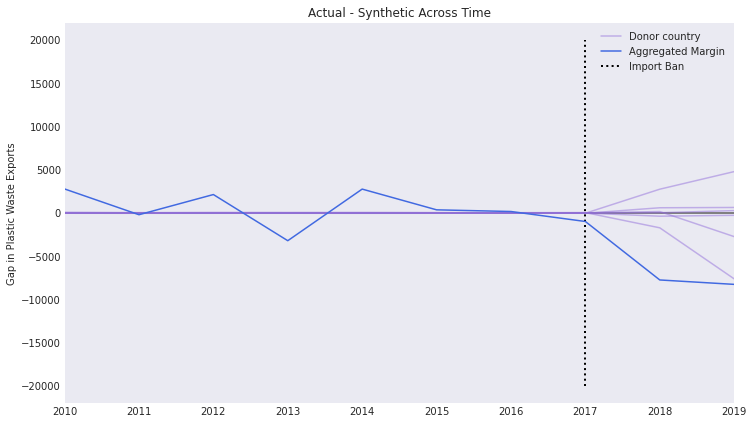

In [ ]:
# Plot the synthetic-control effects for every country in the treatemnt and the donor pool.
df_test = df_1[df_1['Year'] < 2020]
synthetic_states = [synthetic_control(state, Control_imports, df_test) for state in Control_imports]
control = pd.DataFrame()
plt.figure(figsize=(12,7))
for state in synthetic_states[:-1]:
    plt.plot(state["Year"], state["Trade flow"] - state["synthetic"], color="mediumpurple",alpha=0.5)
    control = control.append(state[state['Year'] > 2017])

plt.plot(synthetic_states[-1]["Year"], synthetic_states[-1]["Trade flow"] - synthetic_states[-1]["synthetic"], color="mediumpurple",alpha=0.5, label='Donor country')
control = control.append(synthetic_states[-1][synthetic_states[-1]['Year']>2017])
plt.plot(df_sync.index, Y_jt_I - Y_jt_N, color='royalblue',
         label="Aggregated Margin");

plt.vlines(x=2017, ymin=-20000, ymax=20000, linestyle=":", lw=2, label="Import Ban",color='black')
plt.hlines(y=0, xmin=2010, xmax=2020, lw=2, color='gray')
plt.title("Actual - Synthetic Across Time")
plt.ylabel("Gap in Plastic Waste Exports")
plt.xlim(2010,2019)
plt.legend();

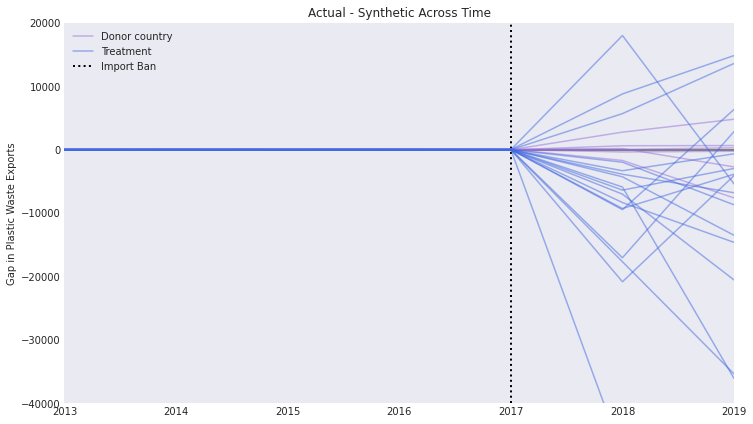

In [ ]:
# Plot the synthetic-control effects for every country in the treatemnt and the donor pool.
df_test = df_1[df_1['Year'] < 2020]
synthetic_states = [synthetic_control(state, Control_imports, df_test) for state in Control_imports]
plt.figure(figsize=(12,7))
for state in synthetic_states[:-1]:
    plt.plot(state["Year"], state["Trade flow"] - state["synthetic"], color="mediumpurple",alpha=0.5)

plt.plot(synthetic_states[-1]["Year"], synthetic_states[-1]["Trade flow"] - synthetic_states[-1]["synthetic"], color="mediumpurple",alpha=0.5, label='Donor country')
t_states = [synthetic_control(state, Control_imports, df_test) for state in Top_imports]
for state in t_states[:-1]:
    plt.plot(state["Year"], state["Trade flow"] - state["synthetic"], color="royalblue",alpha=0.5)
plt.plot(t_states[-1]["Year"], t_states[-1]["Trade flow"] - t_states[-1]["synthetic"], color="royalblue",alpha=0.5, label='Treatment')

plt.vlines(x=2017, ymin=-40000, ymax=20000, linestyle=":", lw=2, label="Import Ban",color='black')
plt.hlines(y=0, xmin=2010, xmax=2020, lw=2, color='gray')
plt.title("Actual - Synthetic Across Time")
plt.ylabel("Gap in Plastic Waste Exports")
plt.xlim(2013,2019)
plt.ylim(-40000,20000)
plt.legend();

In [ ]:
control.groupby('Year')['synthetic'].median()

Year
2018   -631.037219
2019   -708.350743
Name: synthetic, dtype: float64

In [ ]:
sum(df_1['Trade flow'].isna())

0

In [ ]:
inverted2 = df_1[df_1['after_treatment']==0].pivot(index='Country', columns="Year")[['Trade flow']].T
inverted2.drop(columns='Bulgaria').values

array([[ 4.1987830e+03,  3.6145290e+03,  1.6120620e+03,  1.1531732e+04,
         3.9746522e+04,  3.4968910e+03, -2.4000000e-02,  5.3511080e+04,
         5.9149500e+03, -1.6355860e+03,  2.3274290e+03,  1.0926517e+04,
         2.4950830e+03,  8.3527000e+02,  4.7296690e+03,  5.8115040e+03,
        -3.5468220e+03,  6.7881500e+03, -6.7924000e+01,  2.4418767e+04,
         5.7123700e+04, -4.7742100e+02],
       [ 4.2038420e+03,  2.9611130e+03,  1.8533720e+03,  1.2233829e+04,
         4.0831682e+04,  3.7817260e+03,  7.1570000e+00,  5.5062856e+04,
         3.9888000e+03, -3.0551110e+03,  1.3090110e+03,  1.2305676e+04,
         1.1335370e+03,  1.1574400e+03,  5.4523590e+03,  4.2148410e+03,
        -2.0162330e+03,  7.5625200e+03, -8.3390000e+02,  2.6901960e+04,
         6.3092164e+04,  2.1919590e+03],
       [ 5.7770860e+03,  4.1640630e+03,  1.9109170e+03,  1.2387633e+04,
         3.9302019e+04,  4.7922540e+03,  5.7640000e+00,  5.8074048e+04,
         4.6305000e+03, -3.2375420e+03,  2.1580820e+03

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=69838f34-5c32-415f-a320-cc9dfc03e401' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>